### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

In [ ]:
# DONATA POLLOCK's GITHUB REPOSITORY:
https://github.com/donata-p/LSE_DA301_assignment

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file(s) as reviews.
# Import and read the data file:
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [121]:
reviews.dtypes

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object

In [ ]:
# Change type of product to object 
# reviews1[['product']]=reviews1[['product']].astype(object)
# reviews1.dtypes

In [3]:
# Any missing values? No.
reviews_na = reviews[reviews.isna().any(axis = 1)]
print(reviews_na.shape)

reviews_na

(0, 11)


Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

In [ ]:
# Replace the missing values with 0 if need be
# df.fillna(0, inplace=True)

In [122]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [123]:
# Descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [4]:
# Drop unnecessary columns.
reviews1 = reviews.drop(['language', 
                    'platform'], axis = 1)

# View column names.
reviews1.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 3. Rename columns

In [5]:
# Rename the column headers.
reviews2 = reviews1\
.rename(columns={'remuneration (k£)':'remuneration',
                 'spending_score (1-100)':'spending_score'})

# View column names.
reviews2.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 4. Save the DataFrame as a CSV file

In [6]:
# Create a CSV file as output.
reviews2.to_csv('reviews_final.csv')

In [7]:
# Import new CSV file with Pandas.
turtle_reviews = pd.read_csv('reviews_final.csv')

# View DataFrame.
turtle_reviews

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [8]:
# Drop unnecessary columns.
turtle_reviews1 = turtle_reviews.drop(['Unnamed: 0'], axis = 1)

# View column names.
turtle_reviews1.head()

gender  age  remuneration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [ ]:
turtle_reviews1.info()

In [9]:
# Change type of product to object 
turtle_reviews1[['product']]=turtle_reviews1[['product']].astype(object)
turtle_reviews1.dtypes

gender             object
age                 int64
remuneration      float64
spending_score      int64
loyalty_points      int64
education          object
product            object
review             object
summary            object
dtype: object

## 5. Linear regression

<Figure size 432x288 with 0 Axes>

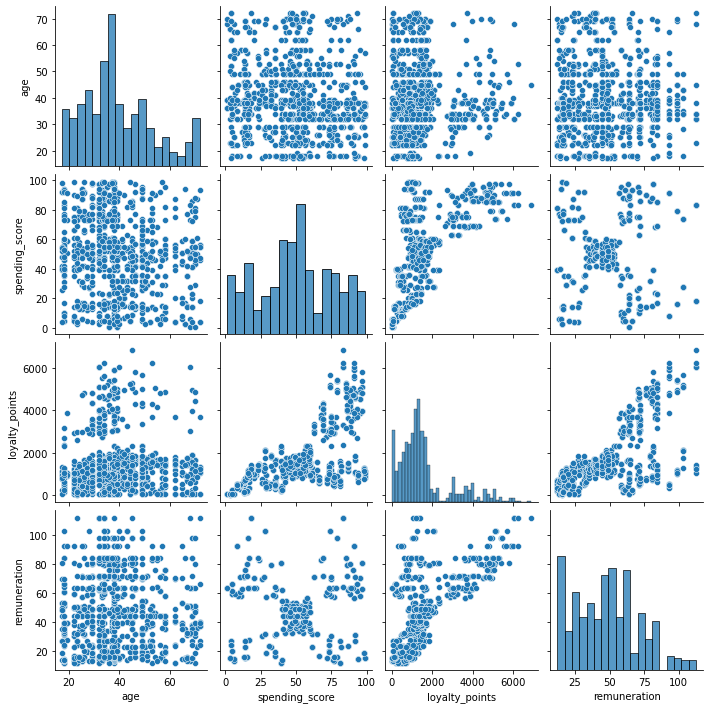

In [10]:
#Check relationship with pair plot before regrassion analysis
#Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pairplot(turtle_reviews1, vars=['age', 'spending_score', 'loyalty_points', 'remuneration'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 5040x720 with 0 Axes>

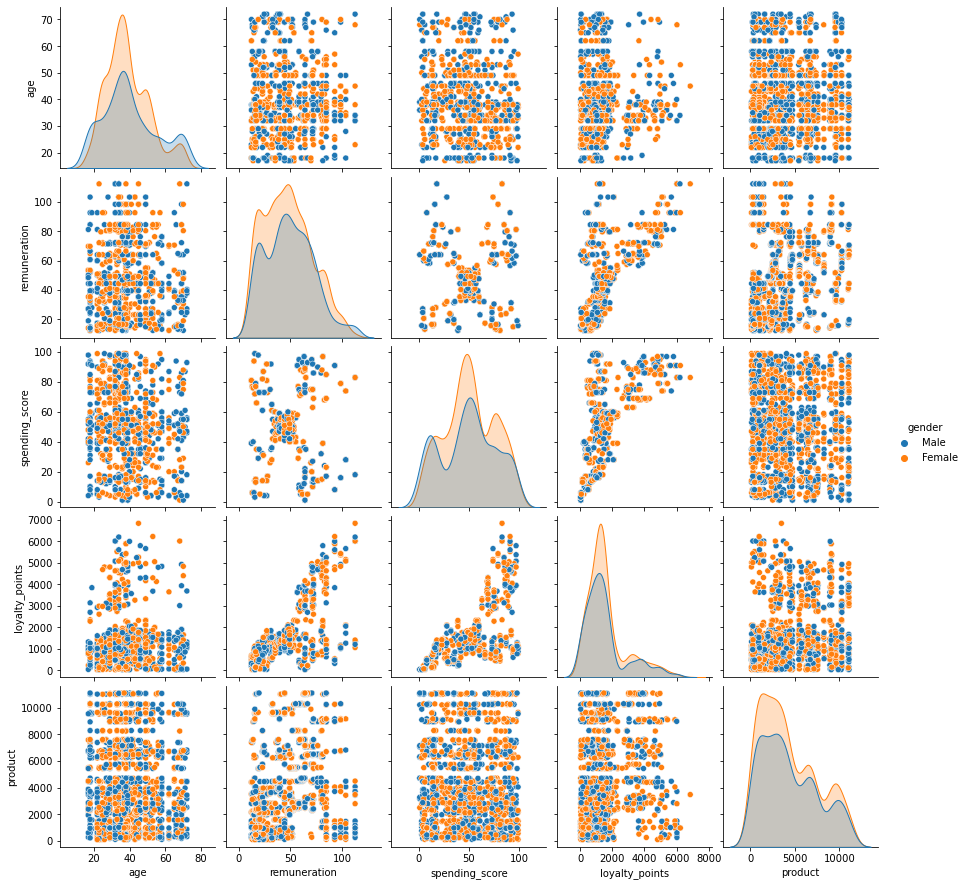

In [11]:
# polt by gender
plt.figure(figsize = (70,10))
ax = sns.pairplot(turtle_reviews1, hue='gender')
plt.show

### 5a) spending vs loyalty

In [12]:
# Define the independent variable.loyalty_points
x = turtle_reviews1['spending_score']

# Define the dependent variable.spending_score
y = turtle_reviews1['loyalty_points'] 

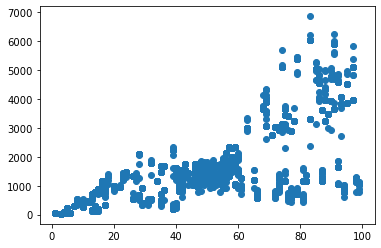

In [13]:
# Check for linearity.
plt.scatter(x, y)

In [14]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = turtle_reviews1).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        10:02:20   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
x            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [16]:
# Set the X coefficient and the constant to generate the regression table.
# x coef:  33.061693
# Constant coef: -75.052663
y_pred =  33.061693 * x -75.052663
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

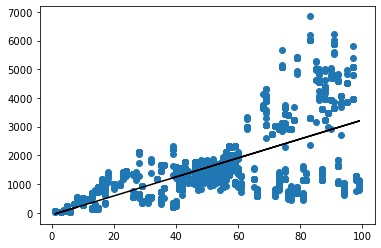

In [17]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

# 5b) renumeration vs loyalty

In [20]:
# Define the independent variable.
x = turtle_reviews1['remuneration']

# Define the dependent variable.
y = turtle_reviews1['loyalty_points'] 

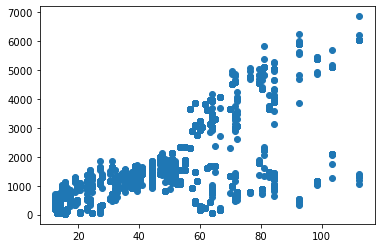

In [21]:
# Check for linearity.
plt.scatter(x, y)

In [22]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = turtle_reviews1).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        10:03:59   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

In [23]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: 34.1878
# Constant coef: -65.6865
y_pred = 34.1878 * x - 65.6865
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

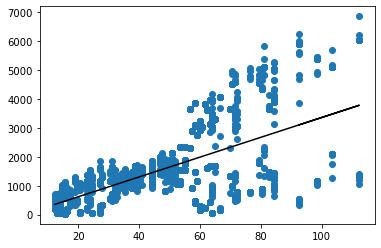

In [24]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

### 5c) age vs loyalty

In [25]:
# Independent variable.
# Define the independent variable.
x = turtle_reviews1['age']

# Define the dependent variable.
y = turtle_reviews1['loyalty_points'] 

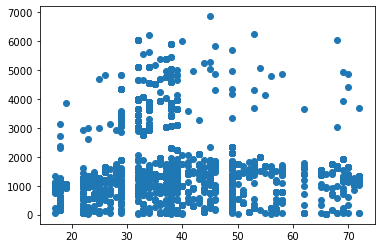

In [26]:
# Check for linearity.
plt.scatter(x, y)

In [27]:
# OLS model and summary.
# Create formula and pass through OLS methods.
f = 'y ~ x'
test = ols(f, data = turtle_reviews1).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 12 Sep 2022   Prob (F-statistic):             0.0577
Time:                        10:05:54   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Set the X coefficient and the constant to generate the regression table.
# x coef: -4.0128
# Constant coef: 1736.5177
y_pred = -4.0128 * x + 1736.5177
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

In [29]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)   

# Extract the predicted values.
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
x              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


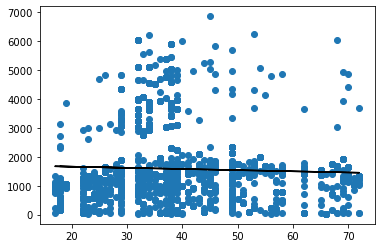

In [31]:
# Plot the graph with a regression line.
plt.scatter(x, y)

plt.plot(x, y_pred, color='black')

## 6. Observations and insights

***Your observations here...***






In [ ]:
# These Linear Regression models are not suitable for this data set.
# Although generaly there is a positive relationship between remuneration and loyalty points iti s not 
# statistically strong enough for predictions.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [32]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [33]:
# Import new CSV file with Pandas.
turtle_reviews4 = pd.read_csv('reviews_final.csv')

# View DataFrame.
turtle_reviews4

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [34]:
# Drop unnecessary columns
df2 = turtle_reviews4.drop(['age','loyalty_points','education','product','review','summary'], axis = 1)

# View DataFrame.'gender',
df2

Unnamed: 0  gender  remuneration  spending_score
0              0    Male         12.30              39
1              1    Male         12.30              81
2              2  Female         13.12               6
3              3  Female         13.12              77
4              4  Female         13.94              40
...          ...     ...           ...             ...
1995        1995  Female         84.46              69
1996        1996  Female         92.66               8
1997        1997    Male         92.66              91
1998        1998    Male         98.40              16
1999        1999    Male         92.66               8

[2000 rows x 4 columns]

In [35]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 62.6+ KB


In [36]:
# Descriptive statistics.
df2.describe()

Unnamed: 0  remuneration  spending_score
count  2000.000000   2000.000000     2000.000000
mean    999.500000     48.079060       50.000000
std     577.494589     23.123984       26.094702
min       0.000000     12.300000        1.000000
25%     499.750000     30.340000       32.000000
50%     999.500000     47.150000       50.000000
75%    1499.250000     63.960000       73.000000
max    1999.000000    112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

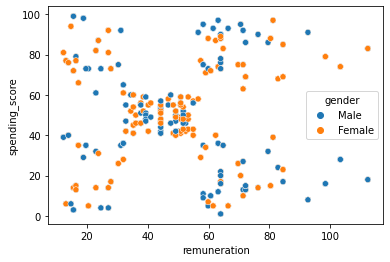

In [37]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score',
                data=df2, hue='gender')

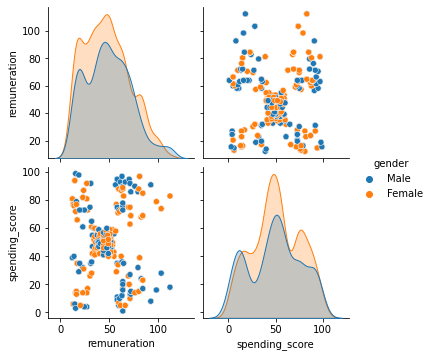

In [38]:
# Create a pairplot with Seaborn.
x = df2[['remuneration', 'spending_score']]

sns.pairplot(df2, vars=x,
              hue='gender', diag_kind= 'kde')

## 3. Elbow and silhoutte methods

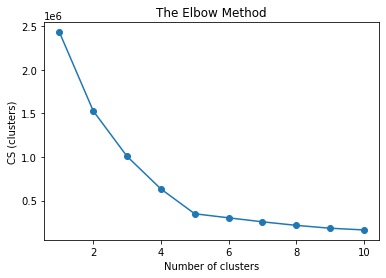

In [39]:
# Determine the number of clusters: Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("CS (clusters)")

plt.show()

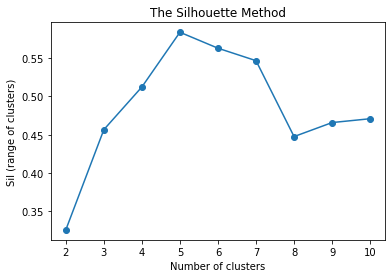

In [40]:
# Determine the number of clusters: Silhouette method.
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x, labels, metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1), sil, marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil (range of clusters)")

plt.show()

## 4. Evaluate k-means model at different values of *k*

Evaluate and fit the model

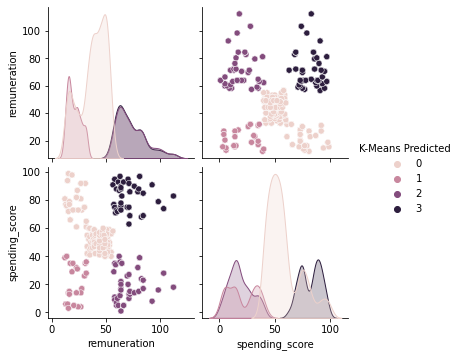

In [41]:
# Use 4 clusters:
kmeans = KMeans(n_clusters = 4, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

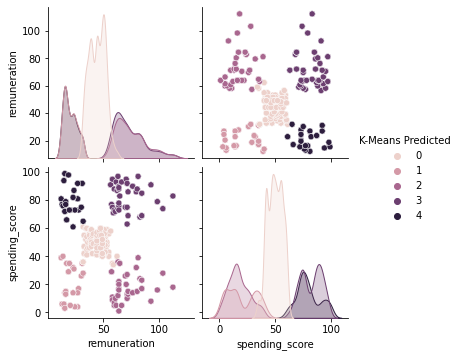

In [42]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

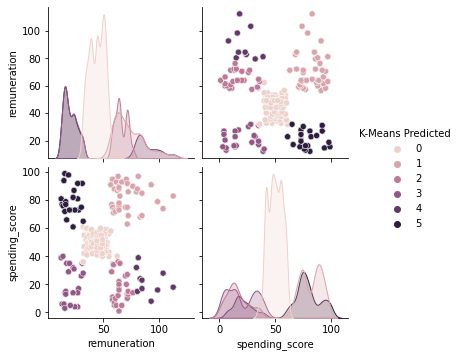

In [43]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

## 5. Fit final model and justify your choice

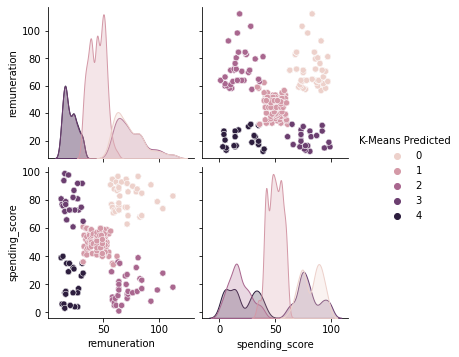

In [44]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5, max_iter = 15000, init='k-means++', random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, hue='K-Means Predicted', diag_kind= 'kde')

In [45]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

Cluster 1 has the most data points, followed by cluster 0.

## 6. Plot and interpret the clusters

In [46]:
# Visualising the clusters.
# View the DataFrame.
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  4
1         12.30              81                  3
2         13.12               6                  4
3         13.12              77                  3
4         13.94              40                  4


<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

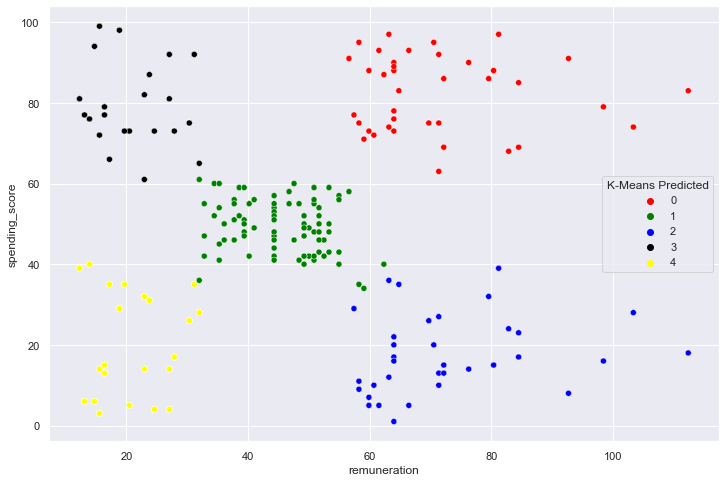

In [47]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x , hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','yellow'])

## 7. Discuss: Insights and observations

***Your observations here...***

5 clusters are clearly visible with some outliers

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [48]:
# Import all the necessary packages.

!pip install wordcloud
!pip install textblob

import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt
import re
import seaborn as sns

nltk.download ('punkt')
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/donatapollock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donatapollock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
# Import new CSV file with Pandas.
df3 = pd.read_csv('reviews_final.csv')

# View DataFrame.
df3

Unnamed: 0  gender  age  remuneration  spending_score  loyalty_points  \
0              0    Male   18         12.30              39             210   
1              1    Male   23         12.30              81             524   
2              2  Female   22         13.12               6              40   
3              3  Female   25         13.12              77             562   
4              4  Female   33         13.94              40             366   
...          ...     ...  ...           ...             ...             ...   
1995        1995  Female   37         84.46              69            4031   
1996        1996  Female   43         92.66               8             539   
1997        1997    Male   34         92.66              91            5614   
1998        1998    Male   34         98.40              16            1048   
1999        1999    Male   32         92.66               8             479   

     education  product                                             review  \
0     graduate      453  When it comes to a DM's screen, the space on t...   
1     graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     graduate      254  Nice art, nice printing.  Why two panels are f...   
3     graduate      263  Amazing buy! Bought it as a gift for our new d...   
4     graduate      291  As my review of GF9's previous screens these w...   
...        ...      ...                                                ...   
1995       PhD      977  The perfect word game for mixed ages (with Mom...   
1996       PhD      979  Great game.  Did not think I would like it whe...   
1997  graduate     1012  Great game for all.........\nKeeps the mind ni...   
1998       PhD     1031                                          fun game!   
1999       PhD      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 10 columns]

In [50]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   remuneration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [51]:
# Drop unnecessary columns
df3 = df3.drop(['Unnamed: 0', 'gender', 'remuneration',  'spending_score', 'age','loyalty_points','education'], axis = 1)

# View DataFrame
df3

product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 3 columns]

In [ ]:
# Any missing values? No.
# df3 = df3[df3.isna().any(axis = 1)]
# print(df3_na.shape)

# df3

In [52]:
# Drop the empty rows.
df3.dropna(subset=['review','summary'], inplace=True)

# View the shape of the DataFrame.
df3.shape

(2000, 3)

In [53]:
# View DataFrame.
df3

product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 3 columns]

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [61]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3.head()

product                                             review  \
0      453  when it comes to a dm's screen, the space on t...   
1      466  an open letter to galeforce9*: your unpainted ...   
2      254  nice art, nice printing. why two panels are fi...   
3      263  amazing buy! bought it as a gift for our new d...   
4      291  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [63]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3.head()

product                                             review  \
0      453  when it comes to a dm's screen, the space on t...   
1      466  an open letter to galeforce9*: your unpainted ...   
2      254  nice art, nice printing. why two panels are fi...   
3      263  amazing buy! bought it as a gift for our new d...   
4      291  as my review of gf9's previous screens these w...   

                                             summary  
0  the fact that 50% of this space is wasted on a...  
1  another worthless dungeon master's screen from...  
2                    pretty, but also pretty useless  
3                                         five stars  
4                                         money trap

In [ ]:
# Summary: Change all to lower case and join with a space.
# df3['summary'] = df3['summary'].str.lower()

In [67]:
# Display the Datafra
df3

product                                             review  \
0         453  when it comes to a dm's screen, the space on t...   
1         466  an open letter to galeforce9*: your unpainted ...   
2         254  nice art, nice printing. why two panels are fi...   
3         263  amazing buy! bought it as a gift for our new d...   
4         291  as my review of gf9's previous screens these w...   
...       ...                                                ...   
1995      977  the perfect word game for mixed ages (with mom...   
1996      979  great game. did not think i would like it when...   
1997     1012  great game for all......... keeps the mind nim...   
1998     1031                                          fun game!   
1999      453  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 3 columns]

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [68]:
# Replace all the punctuations in review column.
# Import the necessary module.
import re

import warnings
warnings.filterwarnings('ignore')

# https://stackoverflow.com/questions/42882019/trying-to-remove-punctuations-from-a-column-in-pandas

In [69]:
# Replace all the puncuations in review column.[\.\?\!\,\:\;\"]
df3['review'] = df3['review'].str.replace('[^\w\s]','')

In [71]:
# Replace all the puncuations in summary column.[^\w\s]
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

In [73]:
# Display the Dataframe
df3

product                                             review  \
0         453  when it comes to a dms screen the space on the...   
1         466  an open letter to galeforce9 your unpainted mi...   
2         254  nice art nice printing why two panels are fill...   
3         263  amazing buy bought it as a gift for our new dm...   
4         291  as my review of gf9s previous screens these we...   
...       ...                                                ...   
1995      977  the perfect word game for mixed ages with mom ...   
1996      979  great game did not think i would like it when ...   
1997     1012           great game for all keeps the mind nimble   
1998     1031                                           fun game   
1999      453  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 3 columns]

### 2c) Drop duplicates in both columns

In [74]:
# check duplicates
df3.duplicated().sum()

1

In [75]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review','summary'])

# View DataFrame.
df3.reset_index(inplace=True)
df3.head()

index  product                                             review  \
0      0      453  when it comes to a dms screen the space on the...   
1      1      466  an open letter to galeforce9 your unpainted mi...   
2      2      254  nice art nice printing why two panels are fill...   
3      3      263  amazing buy bought it as a gift for our new dm...   
4      4      291  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [78]:
# check duplicates
df3.duplicated().sum()

0

In [79]:
# de-duplicated df
df3

index  product                                             review  \
0         0      453  when it comes to a dms screen the space on the...   
1         1      466  an open letter to galeforce9 your unpainted mi...   
2         2      254  nice art nice printing why two panels are fill...   
3         3      263  amazing buy bought it as a gift for our new dm...   
4         4      291  as my review of gf9s previous screens these we...   
...     ...      ...                                                ...   
1956   1995      977  the perfect word game for mixed ages with mom ...   
1957   1996      979  great game did not think i would like it when ...   
1958   1997     1012           great game for all keeps the mind nimble   
1959   1998     1031                                           fun game   
1960   1999      453  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 4 columns]

## 3. Tokenise and create wordclouds

In [80]:
# Create new DataFrame (copy DataFrame).
# df3_copy = pd.concat([no_punct_review, no_punct_summary], ignore_index=True)

df3_copy = df3.copy()
df3_copy.shape

(1961, 4)

In [81]:
df3_copy

index  product                                             review  \
0         0      453  when it comes to a dms screen the space on the...   
1         1      466  an open letter to galeforce9 your unpainted mi...   
2         2      254  nice art nice printing why two panels are fill...   
3         3      263  amazing buy bought it as a gift for our new dm...   
4         4      291  as my review of gf9s previous screens these we...   
...     ...      ...                                                ...   
1956   1995      977  the perfect word game for mixed ages with mom ...   
1957   1996      979  great game did not think i would like it when ...   
1958   1997     1012           great game for all keeps the mind nimble   
1959   1998     1031                                           fun game   
1960   1999      453  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1956      the perfect word game for mixed ages with mom  
1957                                          super fun  
1958                                         great game  
1959                                         four stars  
1960                                     love this game  

[1961 rows x 4 columns]

In [82]:
df3_copy.describe()

index       product
count  1961.000000   1961.000000
mean    995.045385   4322.804691
std     577.274890   3146.837960
min       0.000000    107.000000
25%     497.000000   1592.000000
50%     992.000000   3629.000000
75%    1493.000000   6646.000000
max    1999.000000  11086.000000

In [83]:
# Apply tokenisation to both columns. 
df3_copy['reviewtokens'] = df3_copy['review'].apply(word_tokenize)

# Preview data.
df3_copy['reviewtokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: reviewtokens, dtype: object

In [84]:
df3_copy['summarytokens'] = df3_copy['summary'].apply(word_tokenize)
# Preview data.
df3_copy['summarytokens'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: summarytokens, dtype: object

In [85]:
df3_copy

index  product                                             review  \
0         0      453  when it comes to a dms screen the space on the...   
1         1      466  an open letter to galeforce9 your unpainted mi...   
2         2      254  nice art nice printing why two panels are fill...   
3         3      263  amazing buy bought it as a gift for our new dm...   
4         4      291  as my review of gf9s previous screens these we...   
...     ...      ...                                                ...   
1956   1995      977  the perfect word game for mixed ages with mom ...   
1957   1996      979  great game did not think i would like it when ...   
1958   1997     1012           great game for all keeps the mind nimble   
1959   1998     1031                                           fun game   
1960   1999      453  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                           reviewtokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                          summarytokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 6 columns]

In [86]:
# Assign the raw text data to a variable.,'reviewtokens',

# Define an empty list of tokens.
summarytokens = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    summarytokens = summarytokens + df3_copy['summarytokens'][i]

In [87]:
# Assign the raw text data to a variable.,'reviewtokens',

# Define an empty list of tokens.
reviewtokens = []

for i in range(df3_copy.shape[0]):
    # Add each token to the list.
    reviewtokens = reviewtokens + df3_copy['reviewtokens'][i]

In [88]:
# String all the summary together in a single variable.
summary_str = ''
for word in summarytokens :
    summary_str = summary_str + word + ' '

In [89]:
# View the string to sensecheck working corrrect
print(summary_str)

the fact that 50 of this space is wasted on art and not terribly informative or needed art another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars five

In [90]:
# String all the reviews together in a single variable.
reviewtoken_str = ''
for word in reviewtokens :
    reviewtoken_str = reviewtoken_str + word + ' '

In [91]:
# View the string to sensecheck working corrrect
print(reviewtoken_str)

when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could h

In [92]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

In [93]:
# Review: Create a word cloud for 'summarytokens'.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(summary_str) 

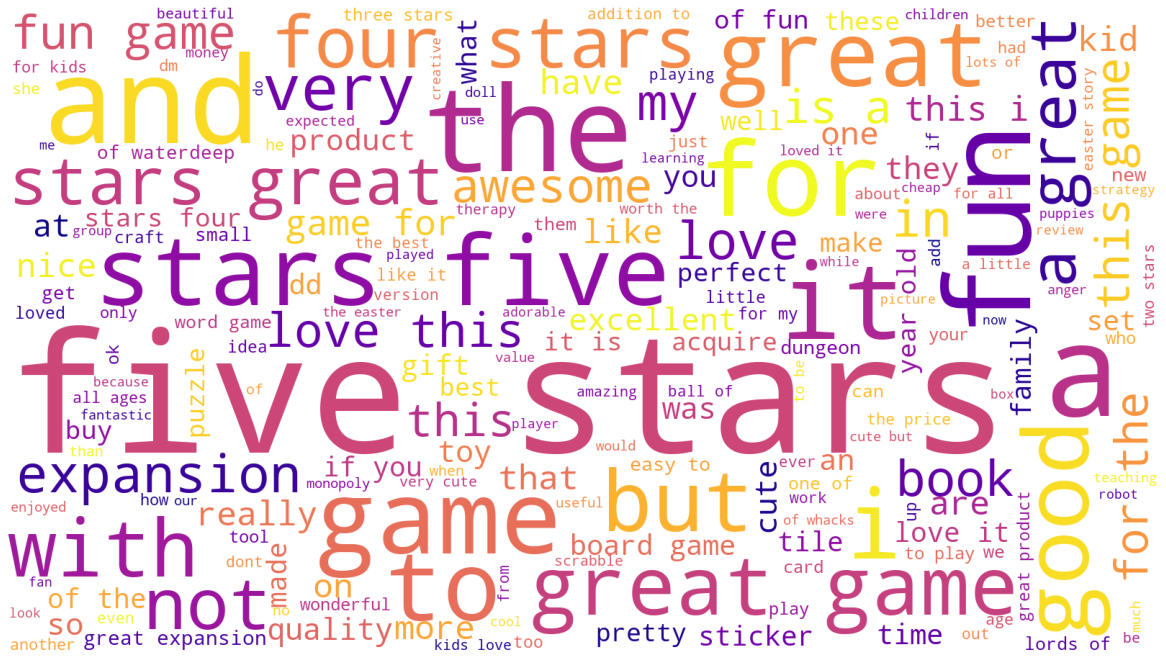

In [94]:
# Review: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [95]:
# Summary: Create a word cloud.
# Review: Create a word cloud for 'reviewtokens'.
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(reviewtoken_str) 

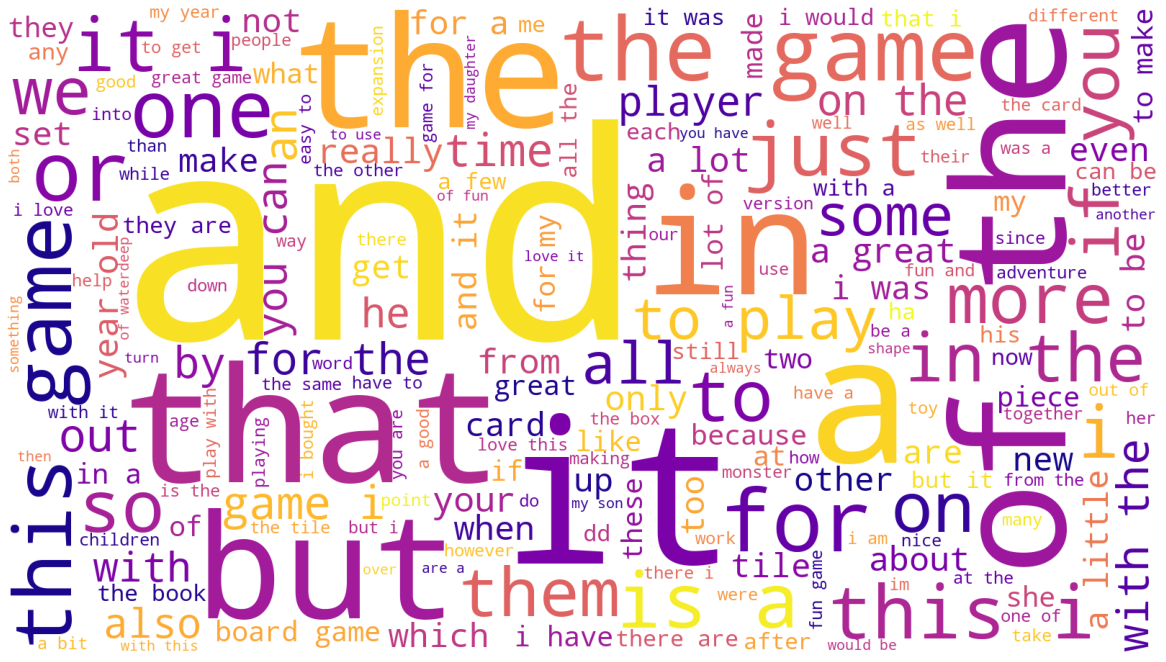

In [96]:
# Summary: Plot the WordCloud image.
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [97]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(reviewtokens)

# Preview data.
fdist

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [98]:
# Determine the frequency distribution.
# Import the FreqDist class.
from nltk.probability import FreqDist

# Calculate the frequency distribution.
fdist = FreqDist(summarytokens)

# Preview data.
fdist

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [99]:
# Delete all the alpanum.
reviewtokens1 = [word for word in reviewtokens if word.isalnum()]

In [100]:
summarytokens1 = [word for word in summarytokens if word.isalnum()]

In [101]:
# Remove all the stopwords
# Download the stop word list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stop words.
reviewtokens2 = [x for x in reviewtokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
reviewtokens2_string = ''

for value in reviewtokens2:
    # Add each filtered token word to the string.
    reviewtokens2_string = reviewtokens2_string + value + ' '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/donatapollock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
# Create a filtered list of tokens without stop words.
summarytokens2 = [x for x in summarytokens1 if x.lower() not in english_stopwords]

# Define an empty string variable.
summarytokens2_string = ''

for value in summarytokens2:
    # Add each filtered token word to the string.
    summarytokens2_string = summarytokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

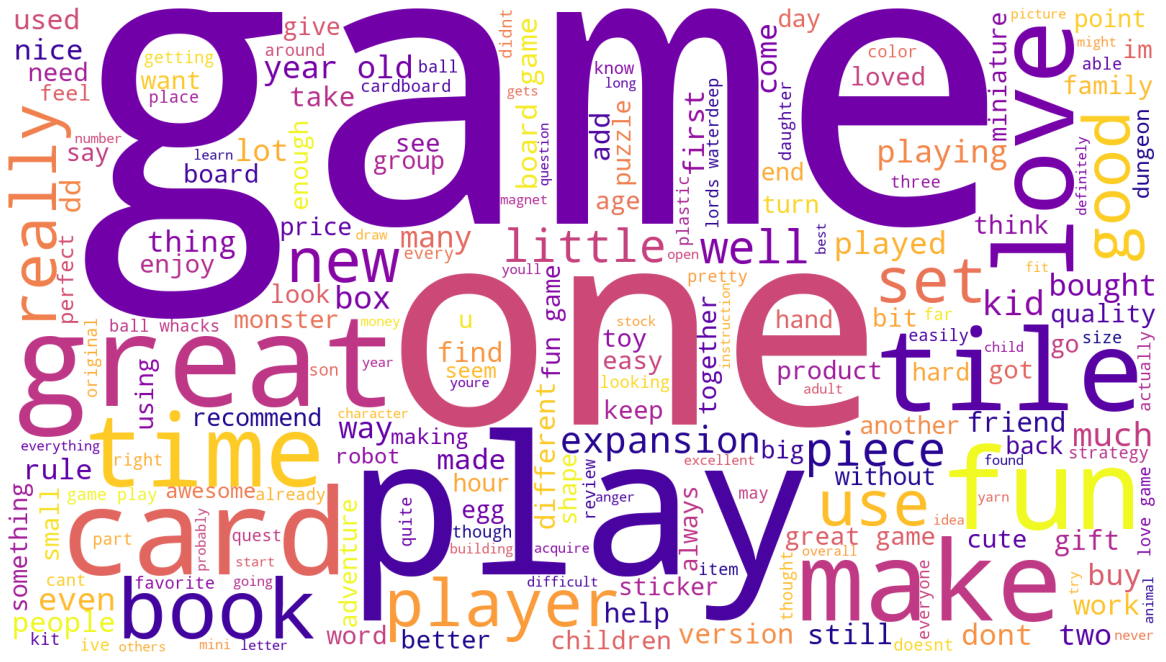

In [103]:
# Create a wordcloud without stop words reviewtokens2_string
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(reviewtokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

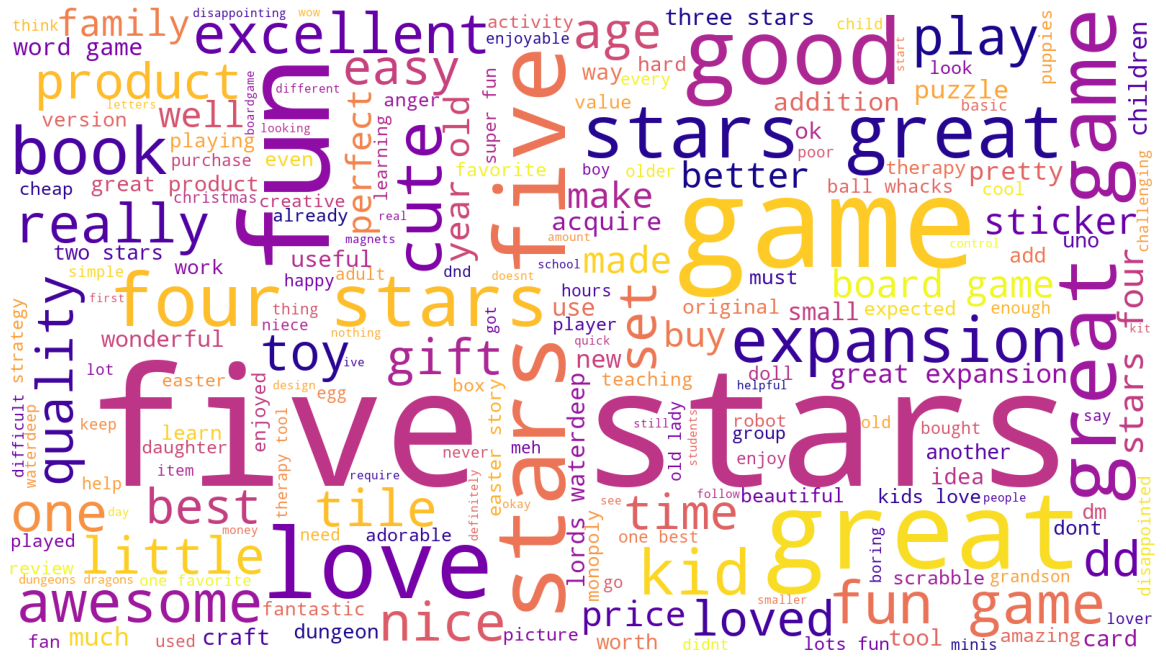

In [104]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(summarytokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [105]:
# Determine the 15 most common words.
fdist1 = FreqDist(reviewtokens2)

# Preview the data.
fdist1

FreqDist({'game': 1671, 'great': 580, 'fun': 552, 'one': 530, 'play': 502, 'like': 414, 'love': 323, 'really': 319, 'get': 319, 'cards': 301, ...})

In [106]:
fdist1 = FreqDist(summarytokens2)

# Preview the data.
fdist1

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [107]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
reviewtokens_counts = pd.DataFrame(Counter(reviewtokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
reviewtokens_counts

Frequency
Word             
game         1671
great         580
fun           552
one           530
play          502
like          414
love          323
really        319
get           319
cards         301
tiles         297
time          291
good          289
would         280
book          273

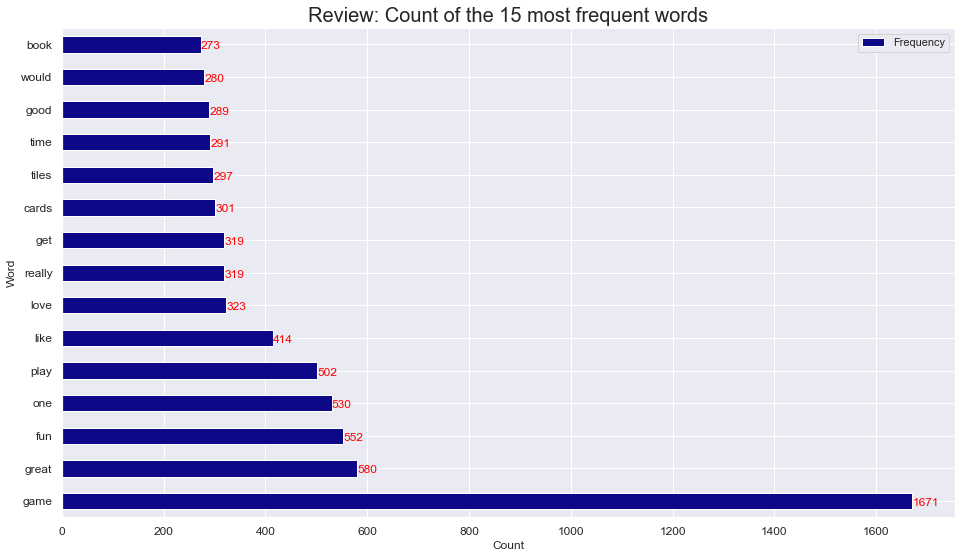

In [108]:
ax = reviewtokens_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Review: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [109]:
# Generate a DataFrame from Counter.
summarytokens_counts = pd.DataFrame(Counter(summarytokens2).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
summarytokens_counts

Frequency
Word                
stars            427
five             342
game             319
great            295
fun              218
love              93
good              92
four              58
like              54
expansion         52
kids              50
cute              45
book              43
one               38
awesome           36

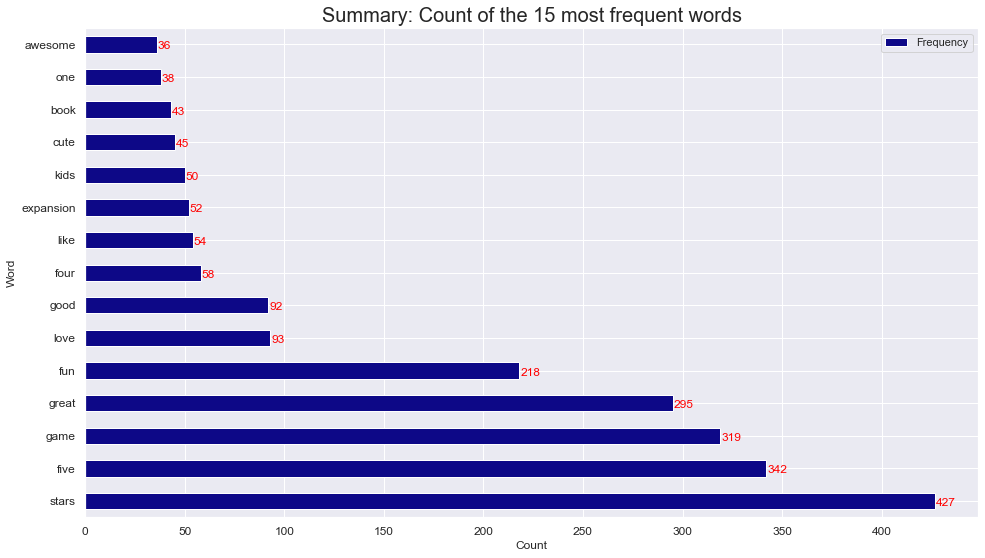

In [110]:
ax = summarytokens_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("Summary: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [111]:
# Provided function.
# Define a function to extract a polarity score for the comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [112]:
df3_copy

index  product                                             review  \
0         0      453  when it comes to a dms screen the space on the...   
1         1      466  an open letter to galeforce9 your unpainted mi...   
2         2      254  nice art nice printing why two panels are fill...   
3         3      263  amazing buy bought it as a gift for our new dm...   
4         4      291  as my review of gf9s previous screens these we...   
...     ...      ...                                                ...   
1956   1995      977  the perfect word game for mixed ages with mom ...   
1957   1996      979  great game did not think i would like it when ...   
1958   1997     1012           great game for all keeps the mind nimble   
1959   1998     1031                                           fun game   
1960   1999      453  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1956      the perfect word game for mixed ages with mom   
1957                                          super fun   
1958                                         great game   
1959                                         four stars   
1960                                     love this game   

                                           reviewtokens  \
0     [when, it, comes, to, a, dms, screen, the, spa...   
1     [an, open, letter, to, galeforce9, your, unpai...   
2     [nice, art, nice, printing, why, two, panels, ...   
3     [amazing, buy, bought, it, as, a, gift, for, o...   
4     [as, my, review, of, gf9s, previous, screens, ...   
...                                                 ...   
1956  [the, perfect, word, game, for, mixed, ages, w...   
1957  [great, game, did, not, think, i, would, like,...   
1958  [great, game, for, all, keeps, the, mind, nimble]   
1959                                        [fun, game]   
1960  [this, game, is, fun, a, lot, like, scrabble, ...   

                                          summarytokens  
0     [the, fact, that, 50, of, this, space, is, was...  
1     [another, worthless, dungeon, masters, screen,...  
2                  [pretty, but, also, pretty, useless]  
3                                         [five, stars]  
4                                         [money, trap]  
...                                                 ...  
1956  [the, perfect, word, game, for, mixed, ages, w...  
1957                                       [super, fun]  
1958                                      [great, game]  
1959                                      [four, stars]  
1960                                 [love, this, game]  

[1961 rows x 6 columns]

In [113]:
# Determine polarity of both columns.
# Populate a new column with polarity scores for each comment.
df3_copy['reviewpolarity'] = df3_copy['review'].apply(generate_polarity)

# Preview the sentiment polarity scores
df3_copy['reviewpolarity'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: reviewpolarity, dtype: float64

In [114]:
# Populate a new column with polarity scores for each comment.
df3_copy['summarypolarity'] = df3_copy['summary'].apply(generate_polarity)

# Preview the sentiment polarity scores
df3_copy['summarypolarity'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summarypolarity, dtype: float64

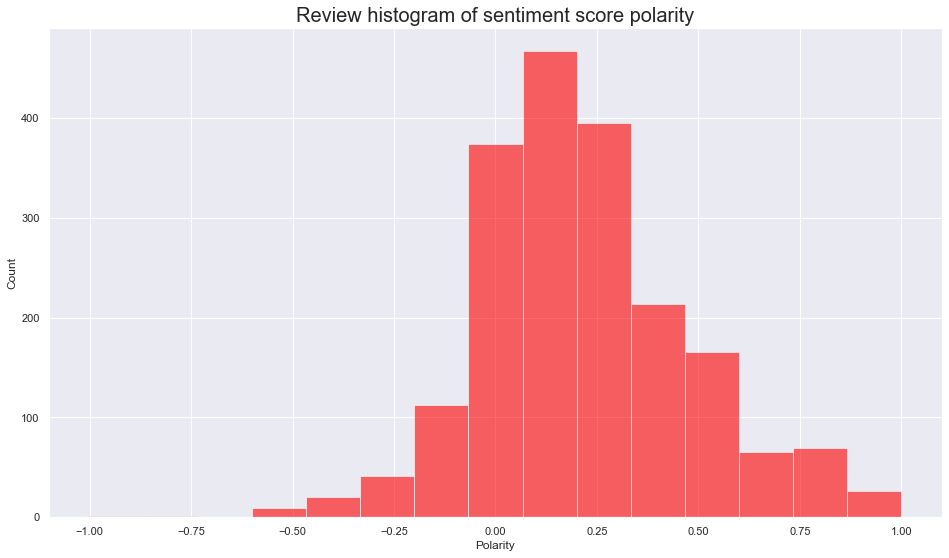

In [115]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['reviewpolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review histogram of sentiment score polarity', fontsize=20)

plt.show();

# Histogram of sentiment score

This plot shows us that most comments sit closest to positive sentiment. more subjective than objective.

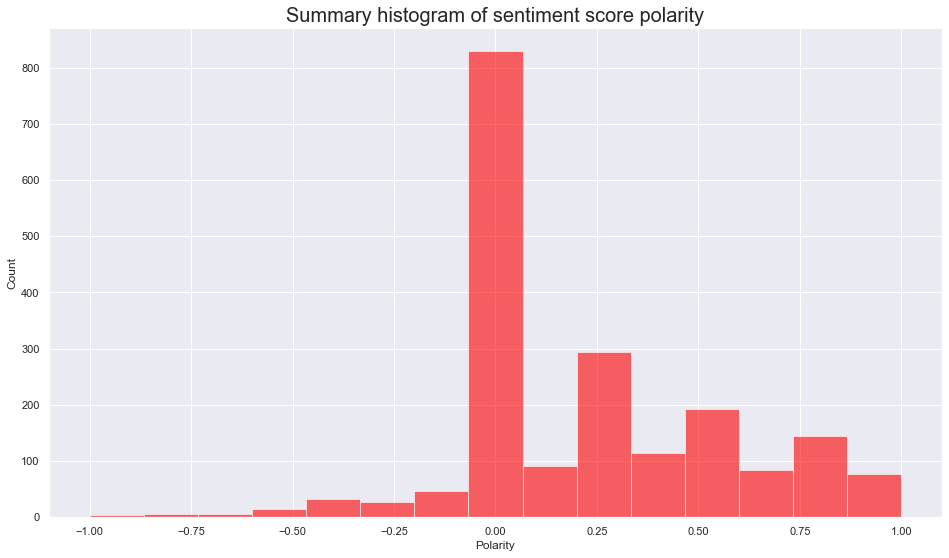

In [116]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df3_copy['summarypolarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary histogram of sentiment score polarity', fontsize=20)

plt.show();

# Histogram of sentiment score

This plot shows us that most comments sit closest to positive sentiment. very objective.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [117]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df3_copy.nsmallest(10, 'reviewpolarity')

# Eliminate unnecessary columns.
# negative_sentiment = negative_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'STREETSEGID']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [118]:
# Top 20 negative summaries.
# Create a DataFrame.
negative_sentiment = df3_copy.nsmallest(10, 'summarypolarity')

# Eliminate unnecessary columns.
# negative_sentiment = negative_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'STREETSEGID']]

# Eliminate unnecessary columns.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [119]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_sentiment = df3_copy.nlargest(20, 'reviewpolarity')

# Eliminate unnecessary columns.
# positive_sentiment = positive_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'subjectivity', 'STREETSEGID']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

In [120]:
# Top 20 positive summaries.
# Create a DataFrame.
positive_sentiment = df3_copy.nlargest(20, 'summarypolarity')

# Eliminate unnecessary columns.
# positive_sentiment = positive_sentiment[['COMMENTS', 'USERTYPE', 'polarity', 'subjectivity', 'STREETSEGID']]

# Adjust the column width.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 7. Discuss: Insights and observations

***Your observations here...***

# 